<a href="https://colab.research.google.com/github/Harshit-patil56/Python-projects/blob/main/ML_PR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. EXP 3. SIMPLE LINEAR REGRESSION

Equation of the line: Y = 1.0689655172413794X + 0.6206896551724128
Mean Squared Error: 0.7996432818073731
R-squared Score: 0.9111507464658475


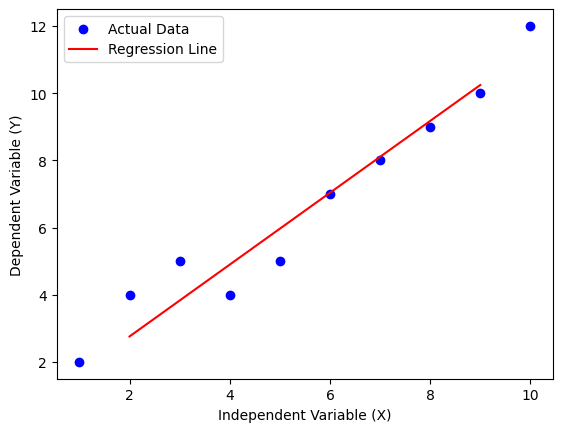

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
y = np.array([2, 4, 5, 4, 5, 7, 8, 9, 10, 12])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

m = model.coef_[0] # Slope
b = model.intercept_ # Intercept
print(f"Equation of the line: Y = {m}X + {b}")


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel("Independent Variable (X)")
plt.ylabel("Dependent Variable (Y)")
plt.legend()
plt.show()

2. EXP 5. TO IMPLEMENT SUPPORT VECTOR MACHINE

Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



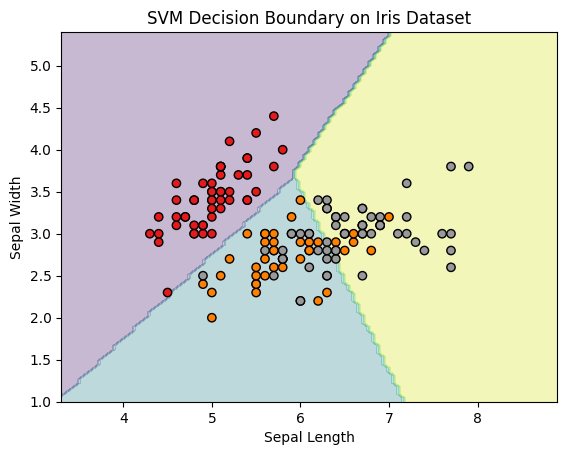

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.Set1)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('SVM Decision Boundary on Iris Dataset')
plt.show()

3. EXP 6 . TO PERFORM HEBBIAN LEARNING RULE

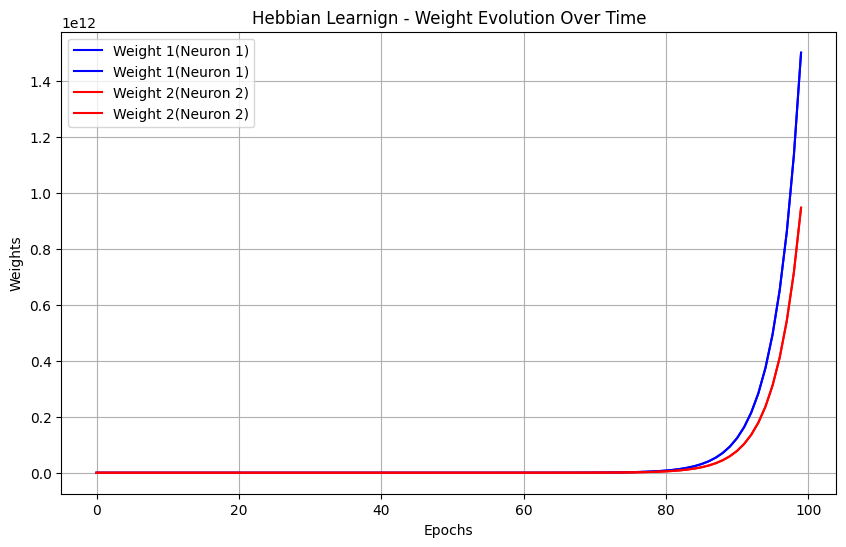

Final Weights After 100 Epoch in Hebbian Learning:
[[1.50181233e+12 9.47565388e+11]
 [1.50181234e+12 9.47565350e+11]]


In [ ]:
import numpy as np

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])


weights = np.random.randn(2, 2)

eta = 0.1
weight_history = []

for epoch in range(100):
    for x in X:
        y = np.dot(x, weights)

        weights += eta * np.outer(x, y)
    weight_history.append(weights.copy())

weight_history=np.array(weight_history)

plt.figure(figsize=(10,6))
plt.plot(weight_history[:, :, 0],label='Weight 1(Neuron 1)',color='blue')
plt.plot(weight_history[:, :, 1],label='Weight 2(Neuron 2)',color='red')
plt.xlabel('Epochs')
plt.ylabel('Weights')
plt.title('Hebbian Learnign - Weight Evolution Over Time')
plt.legend()
plt.grid(True)
plt.show()

print("Final Weights After 100 Epoch in Hebbian Learning:")
print(weights)

4. EXP 7. TO IMPLEMENT EM ALGORITHM FOR GMMM

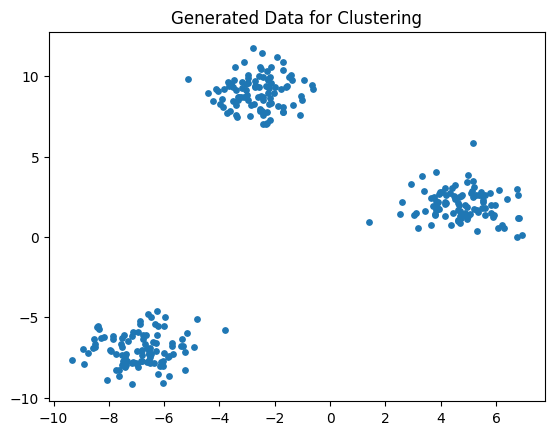

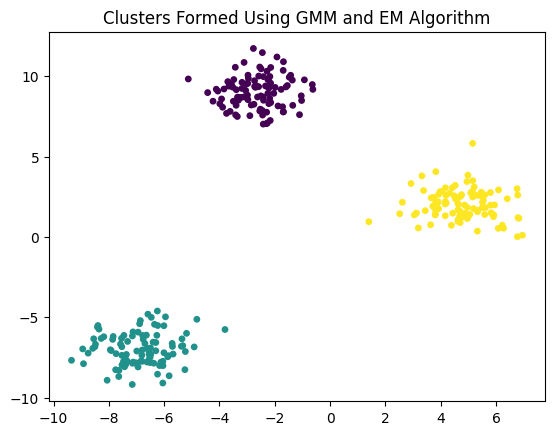

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

plt.scatter(X[:, 0], X[:, 1], s=15)
plt.title("Generated Data for Clustering")
plt.show()

gmm = GaussianMixture(n_components=3, max_iter=100, random_state=42)
gmm.fit(X)

labels = gmm.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=15)
plt.title("Clusters Formed Using GMM and EM Algorithm")
plt.show()


6. EXP 8 : MCULLOH PITS algorithm

In [ ]:
def mc_pitts(inputs, weights, threshold):
    return int(sum(i * w for i, w in zip(inputs, weights)) >= threshold)

print("AND Gate")
for x1, x2 in [(0,0), (0,1), (1,0), (1,1)]:
    print(f"{x1}, {x2} -> {mc_pitts([x1, x2], [1, 1], 1.5)}")

print("\nOR Gate")
for x1, x2 in [(0,0), (0,1), (1,0), (1,1)]:
    print(f"{x1}, {x2} -> {mc_pitts([x1, x2], [1, 1], 0.5)}")

print("\nNOT Gate")
for x in [0, 1]:
    print(f"{x} -> {mc_pitts([x], [-1], -0.5)}")


AND Gate
0, 0 -> 0
0, 1 -> 0
1, 0 -> 0
1, 1 -> 1

OR Gate
0, 0 -> 0
0, 1 -> 1
1, 0 -> 1
1, 1 -> 1

NOT Gate
0 -> 1
1 -> 0


6. EXP 4 : To Implement Logistic Regression

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
Confusion Matrix:
 [[73  7]
 [22 41]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.91      0.83        80
           1       0.85      0.65      0.74    

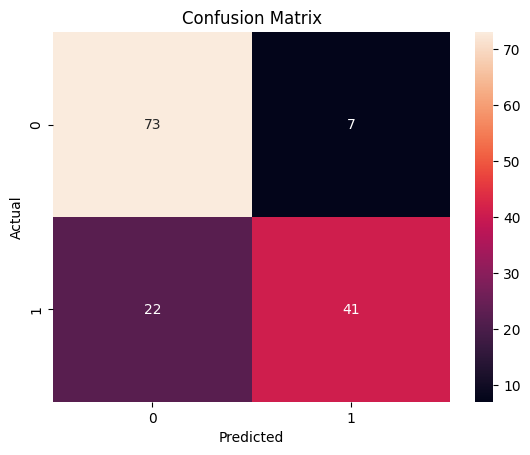

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


titanic = sns.load_dataset('titanic')
print(titanic.head())


titanic.dropna(subset=['age', 'embarked', 'sex'], inplace=True)


titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})


X = titanic[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]
y = titanic['survived']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression(max_iter=1000)


model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
